In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import the numpy, matplotlib and pandas libraries to work with arrays, visualization and matrices, respectively

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Import the dataset and split into two vectors for independent and dependent variables

In [3]:
dataset = pd.read_csv('/content/drive/My Drive/Multi Linear Regression/50_Startups_multi.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

Graph the values from each independent variable against the Profit dependent variable in a separate scatter plot using matplotlib

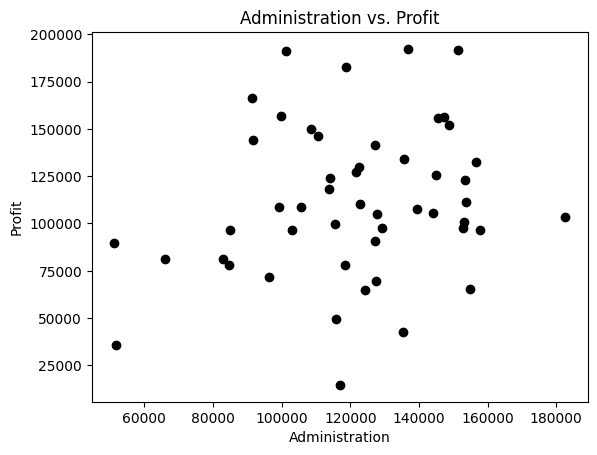

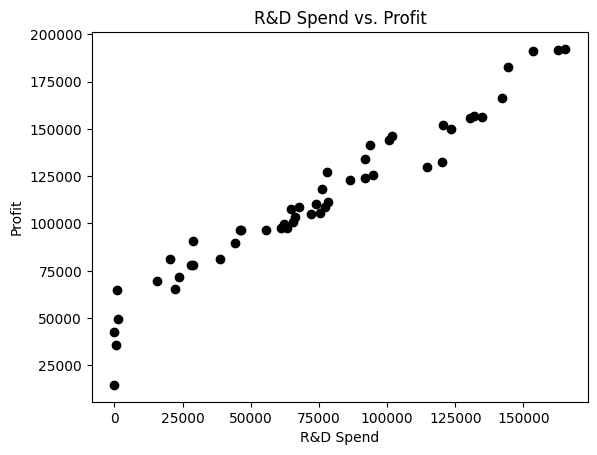

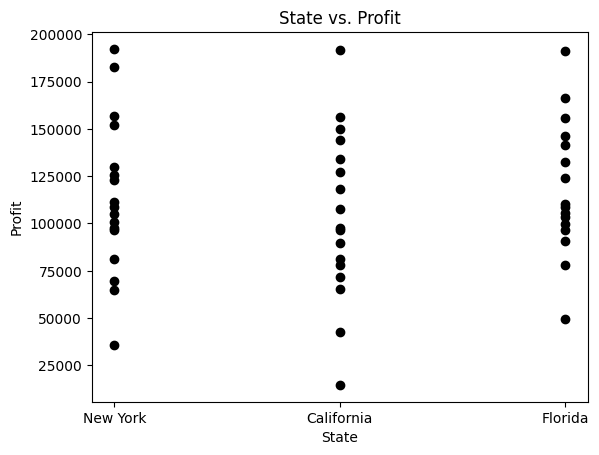

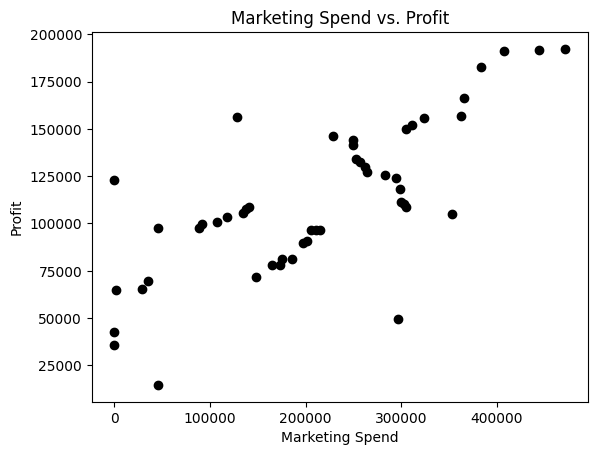

In [4]:
rd = np.array(dataset["R&D Spend"])
ad = np.array(dataset["Administration"])
mk = np.array(dataset["Marketing Spend"])
st = np.array(dataset["State"])
pf = np.array(dataset["Profit"])

plt.scatter(ad, pf, color= 'black')
plt.title('Administration vs. Profit')
plt.xlabel('Administration')
plt.ylabel('Profit')
plt.show()

plt.scatter(rd, pf, color= 'black')
plt.title('R&D Spend vs. Profit')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.show()

plt.scatter(st, pf, color= 'black')
plt.title('State vs. Profit')
plt.xlabel('State')
plt.ylabel('Profit')
plt.show()

plt.scatter(mk, pf, color= 'black')
plt.title('Marketing Spend vs. Profit')
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.show()

In [5]:
print(X)

[[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 [144372.41 118671.85 383199.62 'New York']
 [142107.34 91391.77 366168.42 'Florida']
 [131876.9 99814.71 362861.36 'New York']
 [134615.46 147198.87 127716.82 'California']
 [130298.13 145530.06 323876.68 'Florida']
 [120542.52 148718.95 311613.29 'New York']
 [123334.88 108679.17 304981.62 'California']
 [101913.08 110594.11 229160.95 'Florida']
 [100671.96 91790.61 249744.55 'California']
 [93863.75 127320.38 249839.44 'Florida']
 [91992.39 135495.07 252664.93 'California']
 [119943.24 156547.42 256512.92 'Florida']
 [114523.61 122616.84 261776.23 'New York']
 [78013.11 121597.55 264346.06 'California']
 [94657.16 145077.58 282574.31 'New York']
 [91749.16 114175.79 294919.57 'Florida']
 [86419.7 153514.11 0.0 'New York']
 [76253.86 113867.3 298664.47 'California']
 [78389.47 153773.43 299737.29 'New York']
 [73994.56 122782.75 303319.26 'Florida']
 [67532

Encode the data using OrdinalEncoder

In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
ct = ColumnTransformer(transformers=[('encoder', OrdinalEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
print(X)

[[2.0 165349.2 136897.8 471784.1]
 [0.0 162597.7 151377.59 443898.53]
 [1.0 153441.51 101145.55 407934.54]
 [2.0 144372.41 118671.85 383199.62]
 [1.0 142107.34 91391.77 366168.42]
 [2.0 131876.9 99814.71 362861.36]
 [0.0 134615.46 147198.87 127716.82]
 [1.0 130298.13 145530.06 323876.68]
 [2.0 120542.52 148718.95 311613.29]
 [0.0 123334.88 108679.17 304981.62]
 [1.0 101913.08 110594.11 229160.95]
 [0.0 100671.96 91790.61 249744.55]
 [1.0 93863.75 127320.38 249839.44]
 [0.0 91992.39 135495.07 252664.93]
 [1.0 119943.24 156547.42 256512.92]
 [2.0 114523.61 122616.84 261776.23]
 [0.0 78013.11 121597.55 264346.06]
 [2.0 94657.16 145077.58 282574.31]
 [1.0 91749.16 114175.79 294919.57]
 [2.0 86419.7 153514.11 0.0]
 [0.0 76253.86 113867.3 298664.47]
 [2.0 78389.47 153773.43 299737.29]
 [1.0 73994.56 122782.75 303319.26]
 [1.0 67532.53 105751.03 304768.73]
 [2.0 77044.01 99281.34 140574.81]
 [0.0 64664.71 139553.16 137962.62]
 [1.0 75328.87 144135.98 134050.07]
 [2.0 72107.6 127864.55 353183.

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4)

Use LinearRegression since Multi Linear Regression is Linear Regression with more than one independent variable. Pass in X_train and y_train in the fit() method.

In [8]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

Save predictions from X_test values and the model into y_pred. Use precision value of 3 to round the values to the 3rd decimal place, and use the reshape method to organize the data in columns.

In [9]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=3)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

[[156956.212 156122.51 ]
 [ 55648.365  35673.41 ]
 [135640.404 144259.4  ]
 [173954.376 166187.94 ]
 [129223.204 141585.52 ]
 [ 99244.337  97483.56 ]
 [159175.55  155752.6  ]
 [100139.41  107404.34 ]
 [ 76656.037  77798.83 ]
 [129357.448 124266.9  ]
 [114213.69  110352.25 ]
 [ 99504.607 103282.38 ]
 [ 98877.594  96778.92 ]
 [148818.208 129917.04 ]
 [114903.227 126992.93 ]]
